The data set includes three iris species with 50 samples each as well as some properties about each flower.

In this notebook I will explain How to effectively use logistic regression to solve classification problems. I will try to explain each and every step in a concise and clear manner. we will go through the following, step by step:
- [Reading and understanding the data](#read)
- [Data visualization and explanatory data analysis](#visual)
- [Feature engineering: Data prep for the model](#prepare)
- [Model building](#build)
- [Model evaluation](#eval1)
- [Model optimization: hyper parameter tuning](#hyper)
- [Model re-evaluation](#eval2)

### **<a id = "read">Reading and understanding the data</a>**

In [1]:
# import the necessary liberaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visuals
import seaborn as sns # advanced visuals

import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
df = pd.read_csv("./practice1_data.csv")

In [3]:
# display the first 5 rows
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,classes
0,2.163950,0.015729,-1.136593,2.182571,-1.552051,-0.909067,1.791084,-1.094894,0.308272,-0.912365,0
1,1.364464,-1.359741,-1.881798,-0.484231,-1.974301,-0.017010,2.184909,-1.012308,-0.774774,-3.702803,0
2,1.237133,0.945965,-0.008633,0.889645,0.348132,-1.863290,-1.093229,0.057705,1.646754,-0.834884,2
3,0.530019,2.739019,1.168152,-0.182967,-0.313546,1.274500,1.097952,-0.909685,1.490564,2.300722,1
4,-1.169403,-0.387841,0.049067,-2.136358,-1.839488,-0.635955,-0.136341,0.357952,-0.376029,-2.323494,2


In [4]:
# main characteristics of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x1       1500 non-null   float64
 1   x2       1500 non-null   float64
 2   x3       1500 non-null   float64
 3   x4       1500 non-null   float64
 4   x5       1500 non-null   float64
 5   x6       1500 non-null   float64
 6   x7       1500 non-null   float64
 7   x8       1500 non-null   float64
 8   x9       1500 non-null   float64
 9   x10      1500 non-null   float64
 10  classes  1500 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 129.0 KB


The dataframe has 150 non-null values. It has 6 variables, all of them are in the right data type.
the first variable "Id" seems to be redundant and unnecessary for the our analysis, we can drop it and keep the rest of variables. 

In [5]:
# summary statistics
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,classes
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.550329,-0.275385,-0.383910,-0.017770,-0.044157,0.042072,0.056311,-0.244578,-0.083342,0.524397,1.497333
std,1.489842,1.711574,1.390968,0.976437,1.003190,1.013082,1.560251,1.594473,1.623737,1.558246,1.117807
min,-4.857101,-5.631583,-4.554755,-3.402785,-3.620247,-3.667087,-4.975684,-4.642937,-5.973969,-4.764986,0.000000
25%,-0.437339,-1.423198,-1.364413,-0.631979,-0.682299,-0.644789,-1.112853,-1.338483,-1.167791,-0.475189,0.000000
50%,0.601106,-0.427568,-0.462918,0.009628,-0.045481,0.057803,-0.064162,-0.432473,-0.119206,0.593918,1.000000
75%,1.566922,0.800646,0.522196,0.625042,0.660479,0.752421,1.215963,0.844740,0.886031,1.538664,2.000000
max,5.147879,5.616177,4.930330,3.357813,3.626218,3.363034,4.344007,6.598312,6.945688,5.798377,3.000000


From the summary statistics we can notice that Sepal leafs are wider and longer than Petal lefs, this can be clearly demonstrated in the following image:

![](https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png)

In [6]:
# How many species in our dataframe?
# is the data balanced?
df["classes"].value_counts()

0    376
2    376
1    375
3    373
Name: classes, dtype: int64

The data is clean and balanced with exactly the same number of flowers per species: 50 flowers. but why do we care about the balance between number of observations per class? 

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class.

For example, an imbalanced multiclass classification problem may have 80 percent examples in the first class, 18 percent in the second class, and 2 percent in a third class.

The minority class is harder to predict because there are few examples of this class, by definition. This means it is more challenging for a model to learn the characteristics of examples from this class, and to differentiate examples from this class from the majority class (or classes).

This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class. 

More detailed explanation can be found [here](https://machinelearningmastery.com/what-is-imbalanced-classification/).

### **<a id = 'visual'>Data visualization and explanatory data analysis</a>**

This section focuses on how to produce and analyze charts that meets the best practices in both academia and industry. we will try to meet the following criteria in each graph:
1. **Chose the right graph that suits the variable type:** to display the distribution of categorical variables we might opt for count or bar plot. As for continuous variables we might go with a histogram. If we wan to study the distribution of a continuous variable per each calss of other categorical variable we can use a box plots or a kde plot with hue parameter... etc.
2. **Maximize Dagt-Ink Ration:** it equals to the ink used to display the data devided by the total ink used in the graph. Try not to use so many colors without a good reason for that. Aviod using backround colors, or borders or any other unnecessary decorations.
3. **Use clear well written Titles, labels, and tick marks.**

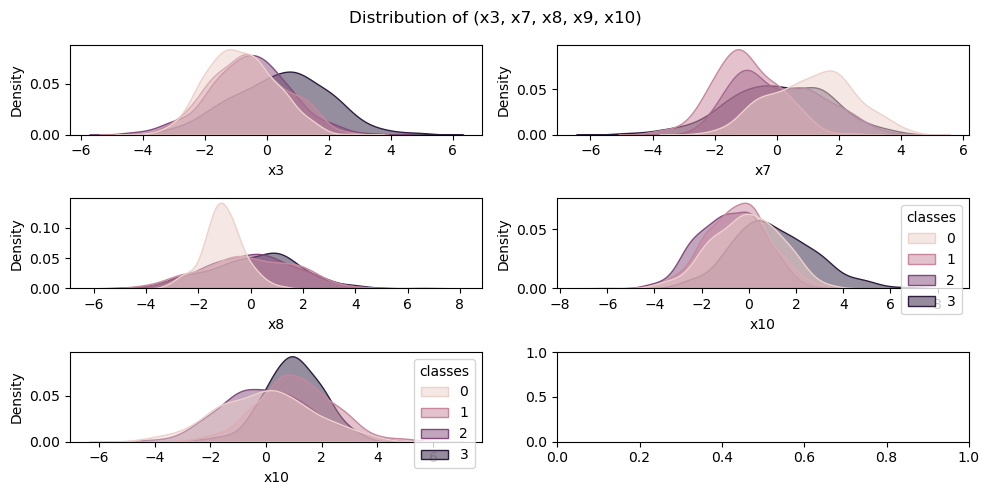

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(10,5), dpi = 100)
fig.suptitle('Distribution of (x3, x7, x8, x9, x10)')

# Distribution of sepal length per classes
sns.kdeplot(ax = axes[0,0], data = df, x = 'x3', hue = "classes", alpha = 0.5, shade = True)
axes[0,0].set_xlabel("x3")
axes[0,0].get_legend().remove()

# Distribution of sepal width per classes
sns.kdeplot(ax = axes[0,1], data = df, x = 'x7', hue = "classes", alpha = 0.5, shade = True)
axes[0,1].set_xlabel("x7")
axes[0,1].get_legend().remove()

# Distribution of petal length per classes
sns.kdeplot(ax = axes[1,0], data = df, x = 'x8', hue = "classes", alpha = 0.5, shade = True)
axes[1,0].set_xlabel("x8")
axes[1,0].get_legend().remove()

# Distribution of petal width per classes
sns.kdeplot(ax = axes[1,1], data = df, x = 'x9', hue = "classes", alpha = 0.5, shade = True)
axes[1,1].set_xlabel("x9")

# Distribution of petal width per classes
sns.kdeplot(ax = axes[2,0], data = df, x = 'x10', hue = "classes", alpha = 0.5, shade = True)
axes[1,1].set_xlabel("x10")

plt.tight_layout()

**Main conclusions from the graph:**
1. Setosa is easily separable from the other species, this means that the model will be able to classify it accurately.
2. Petal length and width is expected to be  better predictors of Species than Sepal lenght and width.

Both conclusions can be demonstrated in the following picture where Setosa is clearly different from other sepcies especially when it comes to its petal leefs, it has a very small sepal width and length comapred to other species.

![](https://miro.medium.com/max/900/0*Uw37vrrKzeEWahdB)

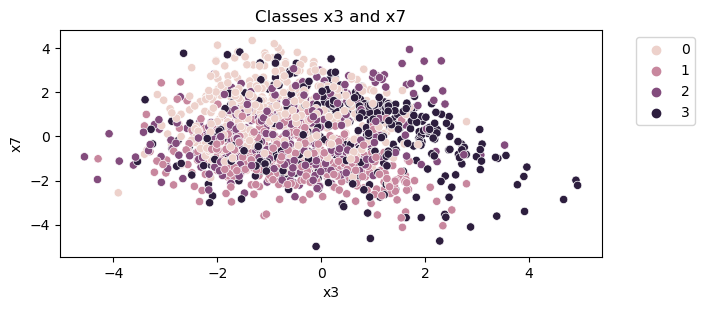

In [8]:
# Scatter plot od petal length vs petal width
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x3', y = 'x7', hue = "classes")
plt.title("Classes x3 and x7")
plt.xlabel("x3")
plt.ylabel("x7")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

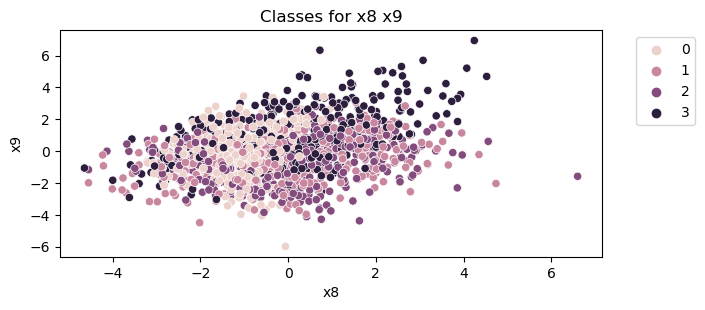

In [9]:
# Scatter plot od sepal length vs petal width
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x8', y = 'x9', hue = "classes")
plt.title("Classes for x8 x9")
plt.xlabel("x8")
plt.ylabel("x9")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

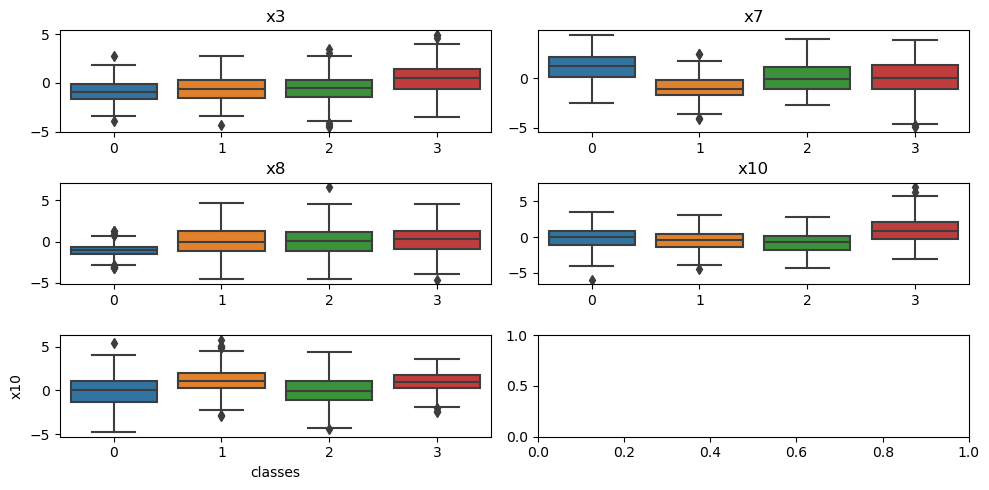

In [10]:
#box plots
fig, axes = plt.subplots(3, 2, figsize=(10,5), dpi = 100)

#x3
sns.boxplot(ax = axes[0,0], data = df, x = "classes", y = 'x3')
axes[0,0].set_xlabel(None)
axes[0,0].set_ylabel(None)
axes[0,0].set_title("x3")


#x7
sns.boxplot(ax = axes[0,1], data = df, x = "classes", y = 'x7')
axes[0,1].set_xlabel(None)
axes[0,1].set_ylabel(None)
axes[0,1].set_title("x7")

#x8
sns.boxplot(ax = axes[1,0], data = df, x = "classes", y = 'x8')
axes[1,0].set_xlabel(None)
axes[1,0].set_ylabel(None)
axes[1,0].set_title("x8")

#x9
sns.boxplot(ax = axes[1,1], data = df, x = "classes", y = 'x9')
axes[1,1].set_xlabel(None)
axes[1,1].set_ylabel(None)
axes[1,1].set_title("x9")

#x10
sns.boxplot(ax = axes[2,0], data = df, x = "classes", y = 'x10')
axes[1,1].set_xlabel(None)
axes[1,1].set_ylabel(None)
axes[1,1].set_title("x10")

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

Scatter and box plots confirmed the aforementioned conclusion, setosa is easily separable based on petal length and width.

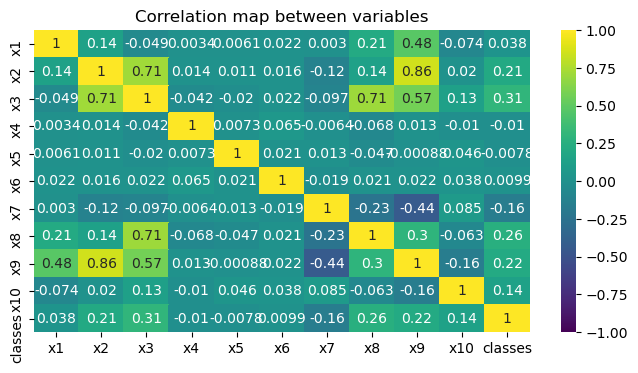

In [11]:
# Correlation map
plt.figure(figsize = (8, 4), dpi = 100)
sns.heatmap(df.corr(), annot = True, cmap = "viridis", vmin = -1, vmax = 1)
plt.title("Correlation map between variables")
#plt.xticks(rotation = 90)
plt.show()

[Correlation is](https://www.jmp.com/en_in/statistics-knowledge-portal/what-is-correlation.html) a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect.

Correlation coefficient ranges between -1 (perfect negative correlation) and 1 (perfect positive correlation). As you can notice, there is a strong positive correlation between petal width and length on one hand and sepal length on the other hand. 

### **<a id = "prepare">Feature engineering: Data prep for the model</a>**

In this section we will make sure that the data is well prepared for training the model. We will:

1. Seprate the dependent variable from the independent ones. 
2. Perform a train test split 
3. Scale the data (feature scaling).

In [12]:
# 1. Seprate the dependent variable from the independent ones.

X = df.drop("classes", axis = 1)
y = df["classes"]

**Why train test split ?** we need to split the data into two parts: 
1. Training part, we will use it to train the model.
2. Test part: this is unseen data (the model has never seen it before), we will use it the test the real performance of the model.

**Why we need to test on unseen data?** why we do not simply train the model on the whole data and then reuse some of it for evaluation? because this will be like giving the student the answers before entring the exam, the model will be very familiar with the evaluation data because he has seen them before and he will get a full mark. In order for the test to be real, the model has to be evaluated on unseen data.

In [13]:
# 2. Perform a train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Why feature scaling?** 

Real Life Datasets have many features with a wide range of values like for example let’s consider the house price prediction dataset. It will have many features like no. of. bedrooms, square feet area of the house, etc

As you can guess, the no. of bedrooms will vary between 1 and 5, but the square feet area will range from 500-2000. This is a huge difference in the range of both features.

Many machine learning algorithms that are using Euclidean distance as a metric to calculate the similarities will fail to give a reasonable recognition to the smaller feature, in this case, the number of bedrooms, which in the real case can turn out to be an actually important metric.

![](https://i.imgflip.com/2rcqrd.png)

To aviod this problem we need to scale the features so that they all have the same scale, i.e the same range of values. We can normalize all features so that have values between (-1, 1) or standardize them to have values between (0, 1). 

The important thing to note here is that feature scaling does not affect the relative importance of features, scaled features will still have the same orginal information and importance relative to each other, this can be clearly demonstated from the image below: despite feature scaling they are still strawberry and apple, they did not lose their meaning.

![](https://miro.medium.com/max/2000/1*yR54MSI1jjnf2QeGtt57PA.png)

In [14]:
# 3. Feature scaling
from sklearn.preprocessing import StandardScaler # import the scaler
scaler = StandardScaler() # initiate it
Scaled_X_train = scaler.fit_transform(X_train) #fit the parameters and use it to trannsform the traning data
Scaled_X_test = scaler.transform(X_test) #transform the test data

Have you noticed that we used .fit_transform() with the traning data and only used .transform() with the test data? we did it to aviod data leakage. Read more about it [from here](https://machinelearningmastery.com/data-preparation-without-data-leakage/) 

### **<a id = "build">Model building</a>** 
We will use logestic regression, but the same methodology can be applied to any other classifier

In [15]:
# Logestic Regression 
from sklearn.linear_model import LogisticRegression # import the classifier
log_model = LogisticRegression() #initiate it
log_model.fit(Scaled_X_train, y_train) #fit the model to the training data

LogisticRegression()

### **<a id = "eval1">Model evaluation</a>**
First we will make predictions using the model on the test data, and then evaluate its performance using the following metrics:
1. **Confusion matrix:** A summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. Here is an example of a confusion matrix: 

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Example-Confusion-matrix.png)

2. **Accuracy score:** the fraction of predictions our model got right (number of correct predictions devided by total number of predictions).
3. **Classification report:** used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. The report shows the main classification metrics precision, recall and f1-score on a per-class basis. **Precision:** What percent of your predictions were correct? - **Recall:** What percent of the positive cases did you catch? - **F1 score:** What percent of positive predictions were correct?.

For more info, click [here](https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation) and [here](https://muthu.co/understanding-the-classification-report-in-sklearn/).

In [16]:
# creating predictions 
y_pred = log_model.predict(Scaled_X_test)

In [17]:
# import evaluation metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [18]:
# create the confusion matrix
confusion_matrix(y_test, y_pred)

array([[46,  4, 10, 14],
       [ 2, 56, 13,  2],
       [ 5, 17, 41,  5],
       [16, 12,  3, 54]], dtype=int64)

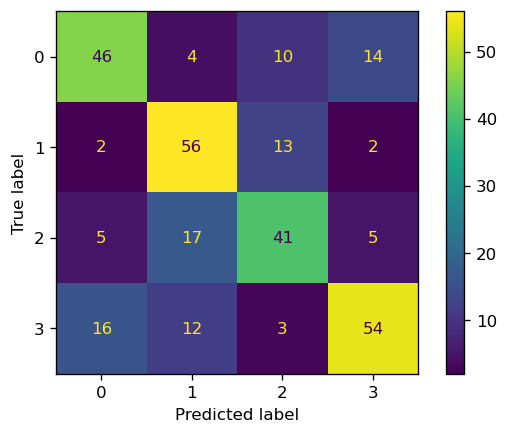

In [19]:
# plot the confusion matrix
fig, ax = plt.subplots(dpi = 120)
plot_confusion_matrix(log_model, Scaled_X_test, y_test, ax = ax);

In [20]:
# measure the accuracy of our model
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 2)

0.66

In [21]:
# generate the classification report 
print(classification_report(y_test, y_pred)) # Hint: try it without using the print() method

              precision    recall  f1-score   support

           0       0.67      0.62      0.64        74
           1       0.63      0.77      0.69        73
           2       0.61      0.60      0.61        68
           3       0.72      0.64      0.67        85

    accuracy                           0.66       300
   macro avg       0.66      0.66      0.65       300
weighted avg       0.66      0.66      0.66       300



As we expected before, the model did a perfect job predicting Setosa. It only misclassified one observation as versicolor, where in fact it is virginica. However, the model performance is near perfect and we could not have done better than that.

### **<a id = "hyper">Model optimization: hyper parameter tuning</a>**
Hyperparameter tuning [is](https://neptune.ai/blog/hyperparameter-tuning-in-python-a-complete-guide-2020) the process of determining the right combination of parameters that allows us to maximize model performance. We will try different values for each parameter and choose the ones that give us the best predictions.

In [22]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV 

# set the range of paprameters
penalty = ['l1', 'l2', 'elasticnet']
C = np.logspace(0,20,50)
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
multi_class = ['ovr', 'multinomial']
l1_ratio = np.linspace(0, 1, 20)

# build the parameter grid
param_grid = {
   'penalty': penalty,
    'C': C,
    'solver': solver,
    'multi_class': multi_class, 
    'l1_ratio': l1_ratio
}

# initiate and fit the Grid Search Model
grid_model = GridSearchCV(log_model, param_grid = param_grid)
grid_model.fit(Scaled_X_train, y_train)


In [ ]:
# best parameters 
grid_model.best_params_

### **<a id = "eval2">Model re-evaluation</a>**
We will evaluate the optimized version of our model and see if it does better than the base model

In [ ]:
# creating predictions 
y_pred = grid_model.predict(Scaled_X_test)

# plot the confusion matrix
fig, ax = plt.subplots(dpi = 120)
plot_confusion_matrix(grid_model, Scaled_X_test, y_test, ax = ax);

In [ ]:
# measure the accuracy of our model
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 2)

In [ ]:
# generate the classification report 
print(classification_report(y_test, y_pred)) # Hint: try it without using the print() method

The optimized model did a completely perfect job. I correctly classified all the examples in the test data. The accuracy of the model is 100 percent. Accuracy improved from 97 percent for the base model to 100 percent for the optimized model.

Congratulations! you have made it to the end of the tutorial. Please leave your feedback and suggestions of improvement